#Problem Statement

##**Context**

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

##**Objective**

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

Facilitate the process of visa approvals.
Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

##**Data Description**

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

case_id: ID of each visa application

continent: Information of continent the employee

education_of_employee: Information of education of the employee

has_job_experience: Does the employee has any job experience? Y= Yes; N = No

requires_job_training: Does the employee require any job training? Y = Yes; N = No

no_of_employees: Number of employees in the employer's company

yr_of_estab: Year in which the employer's company was established

region_of_employment: Information of foreign worker's intended region of employment in the US.

prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.

unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.

full_time_position: Is the position of work full-time? Y = Full-Time Position; N = Part-Time Position

case_status: Flag indicating if the Visa was certified or denied

#Importing necessary libraries

In [ ]:
# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# Loading the dataset

In [ ]:
df=pd.read_csv('/content/EasyVisa.csv')#loading the data
data=df.copy()#getting the copy of the data

#Overview of the data

In [ ]:
# Extracting top 5 rows
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


In [ ]:
#Extracting bottom 5 rows
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.570,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.790,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.850,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.770,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.910,Year,Y,Certified


* Above are top 5 and bottom 5 rows of the dataset
* There are some numerical and some categorical types of data in the dataset

In [ ]:
# checking the shape of the data
data.shape

(25480, 12)

* There are 25480 rows
* And 12 columns

In [ ]:
#checking for duplicate values in the dataset
data.duplicated().sum()

0

* There are no duplicates found in the dataset

In [ ]:
data.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


* There are no missing values in the dataset

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.000,5667.043,22877.929,-26.000,1022.000,2109.000,3504.000,602069.000
yr_of_estab,25480.000,1979.410,42.367,1800.000,1976.000,1997.000,2005.000,2016.000
prevailing_wage,25480.000,74455.815,52815.942,2.137,34015.480,70308.210,107735.513,319210.270


In [ ]:
data[data['no_of_employees']<0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.990,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.140,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.940,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.460,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.970,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.320,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.950,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.500,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.610,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.510,Year,Y,Certified


* There are only 3 numerical columns
* There is a negative value in no of employees which should be taken care before moving to model building.
* There might be outliers in number of employees and in prevailing wage column.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


* There are 12 columns in the dataset.
* 9 columns are object type
* 2 columns are int type
* 1 is float
* We should drop case id column because it might have only unique value

# Exploratory data analysis

##Visualizing the relationships

**The below functions need to be defined to carry out the EDA.**

###writing necessary functions

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

###Univariate analysis

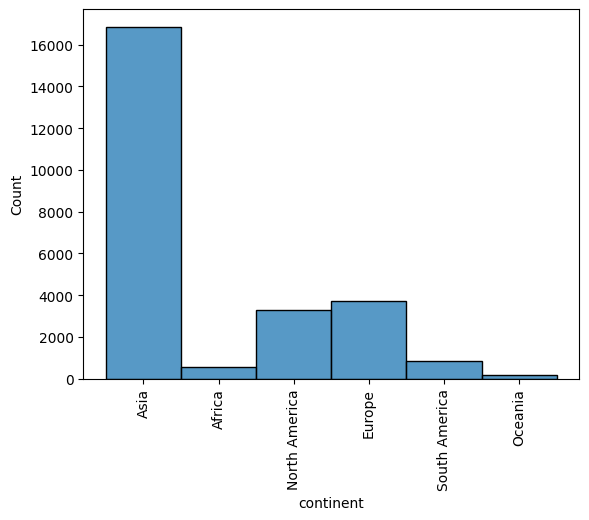

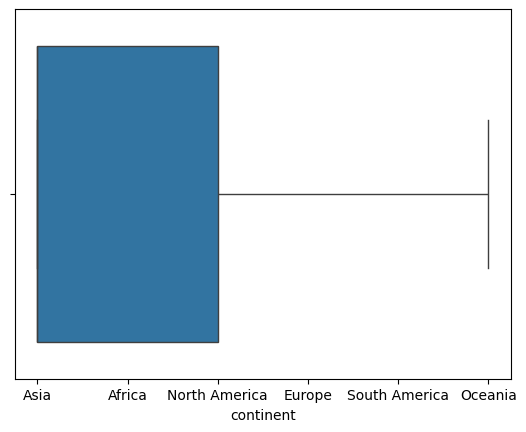

In [ ]:
sns.histplot(data=data,x='continent')
plt.xticks(rotation=90)
plt.show()
sns.boxplot(data=data,x='continent')
plt.show()

* Most of the employees are from Asia continent
* Less number of employees are from oceania

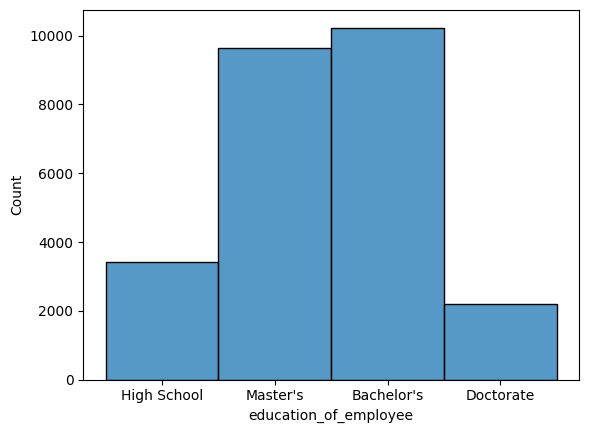

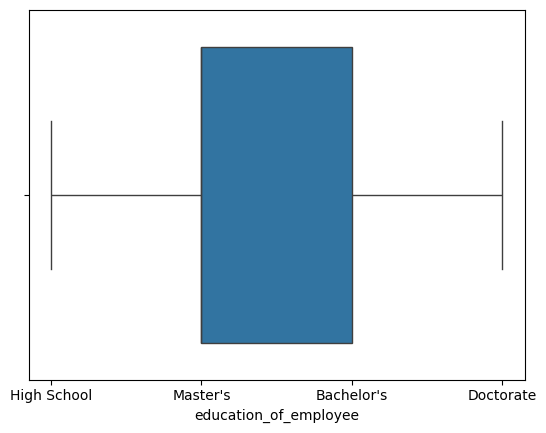

In [ ]:
sns.histplot(data=data,x='education_of_employee')
plt.show()
sns.boxplot(data=data,x='education_of_employee')
plt.show()

* Number of Bachelor's are more than others.
* Number of Master's are lil less than bachelor's.
* Employees who has doctorate are very less even compared to high school.

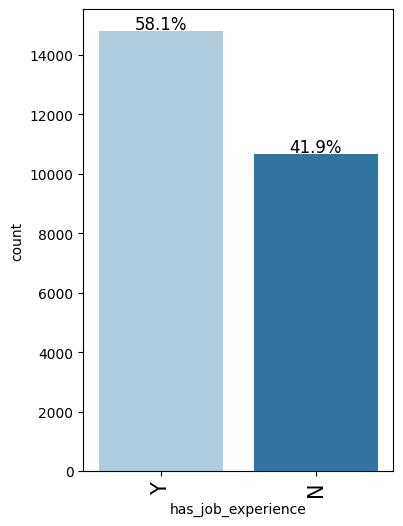

In [ ]:
labeled_barplot(data,'has_job_experience',perc=True);
plt.show()

* Employees with experience are more than the employees without experience.
* Employess with experience has 58%.
* Whereas employees without experience has 41.9%.

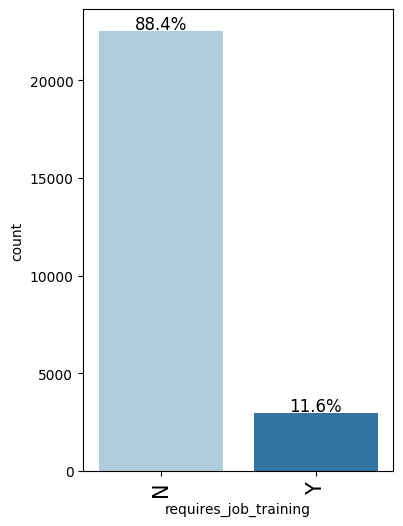

In [ ]:
labeled_barplot(data,'requires_job_training',perc=True)

* Employees who doesn't requires job training are more than the employees who requires job training.
* Those who dont need job training are 88.4%
* Whereas who need job training are 11.6%.

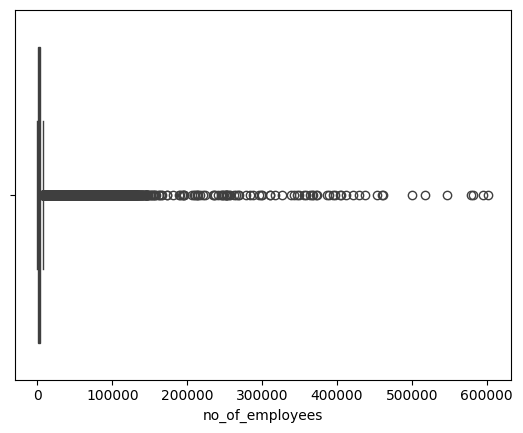

In [ ]:
sns.boxplot(data=data,x='no_of_employees')
plt.show()

* Number of employees has lots of outliers, should work on it.

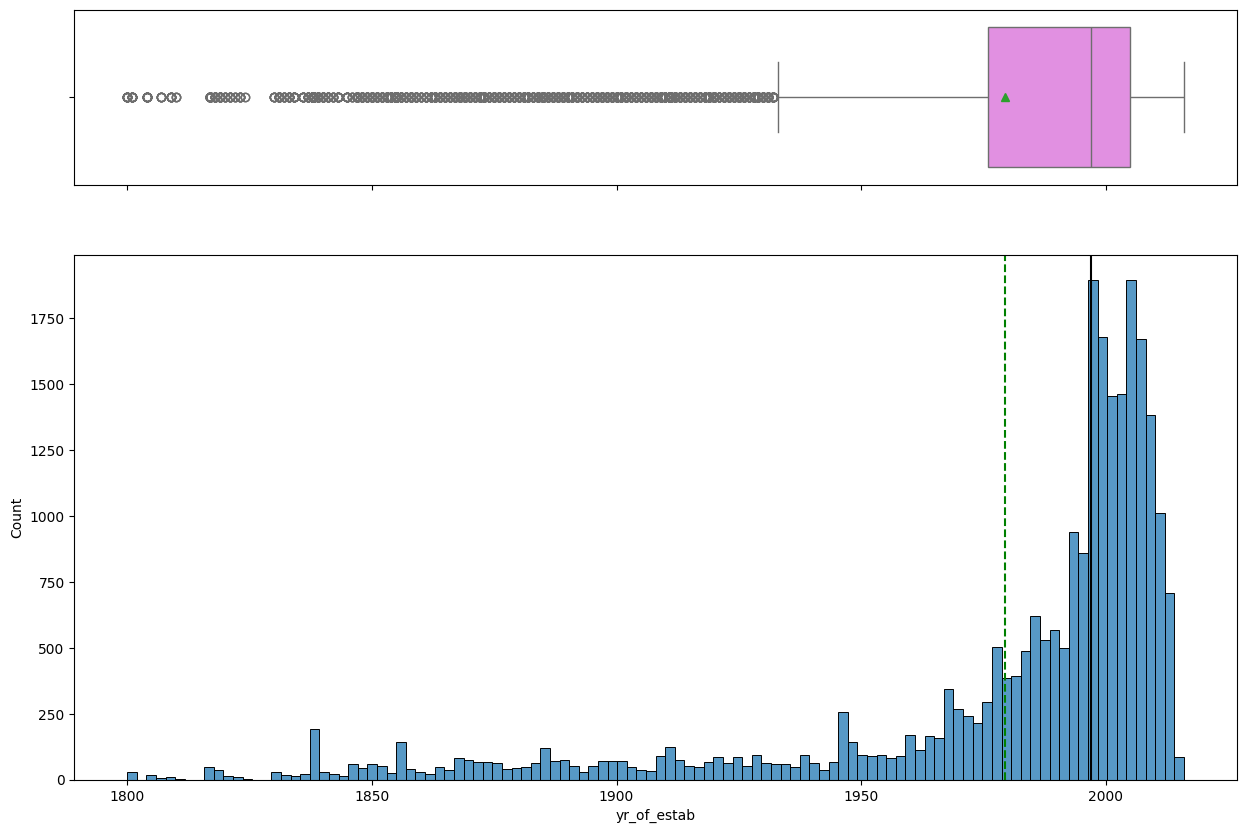

In [ ]:
histogram_boxplot(data,'yr_of_estab')

* Year of establishment is from 1800 to 2000.

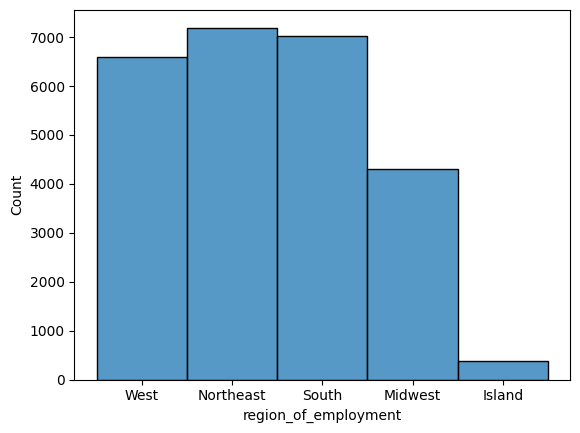

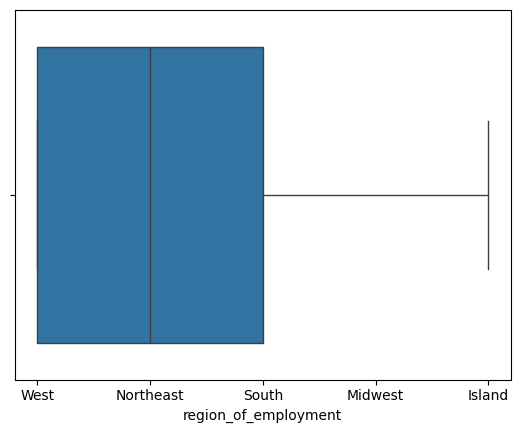

In [ ]:
sns.histplot(data=data,x='region_of_employment')
plt.show()
sns.boxplot(data=data,x='region_of_employment')
plt.show()

* Employees who are from Northeast are more than other regions.
* Employees from Island are very less compared to others.

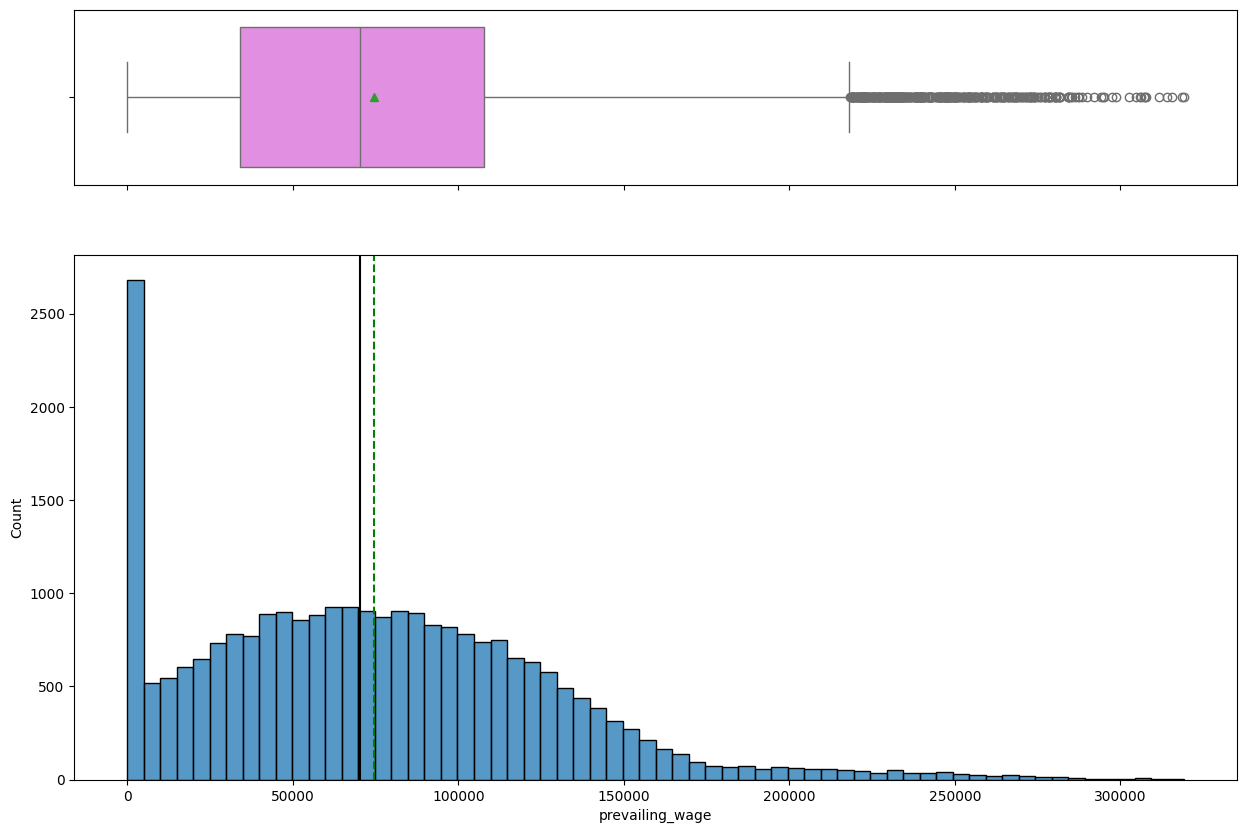

In [ ]:
histogram_boxplot(data,'prevailing_wage')

* Prevailing wages have outliers.
* Its right skewed.

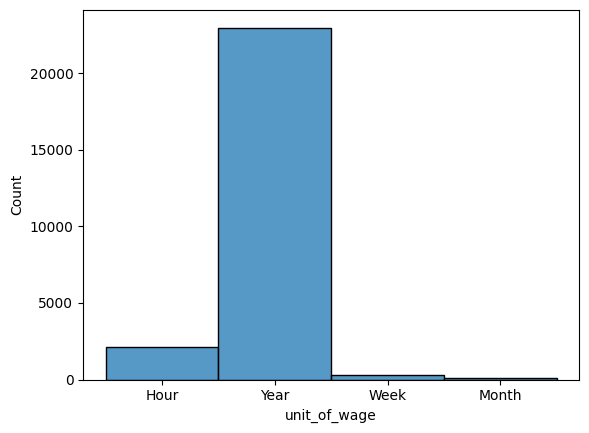

In [ ]:
sns.histplot(data=data,x='unit_of_wage')
plt.show()

* Wages paid based on year is much more than others.
* Wages paid based on month is much lesser than others.

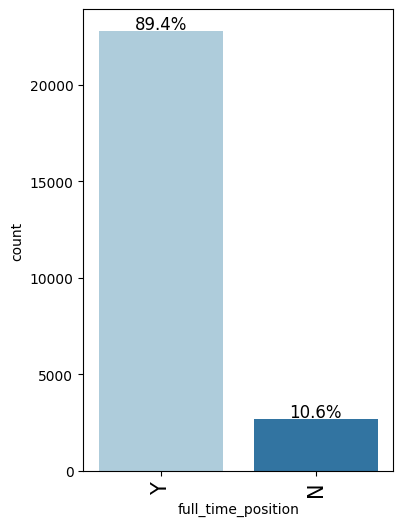

In [ ]:
labeled_barplot(data,'full_time_position',perc=True);

* Employees with full time are much more than employees with part time.
* Employees with full time have 89.4%.
* Employees with part time have 10.64%.

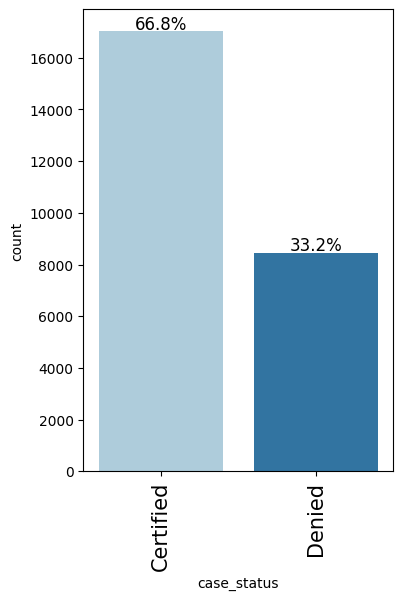

In [ ]:
labeled_barplot(data,'case_status',perc=True)

* Employees with certified visa are much more than denied.
* Employees with certified visa are 66.8%.
* Employees with denied visa are 33.2%.

###Bivariate analysis

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


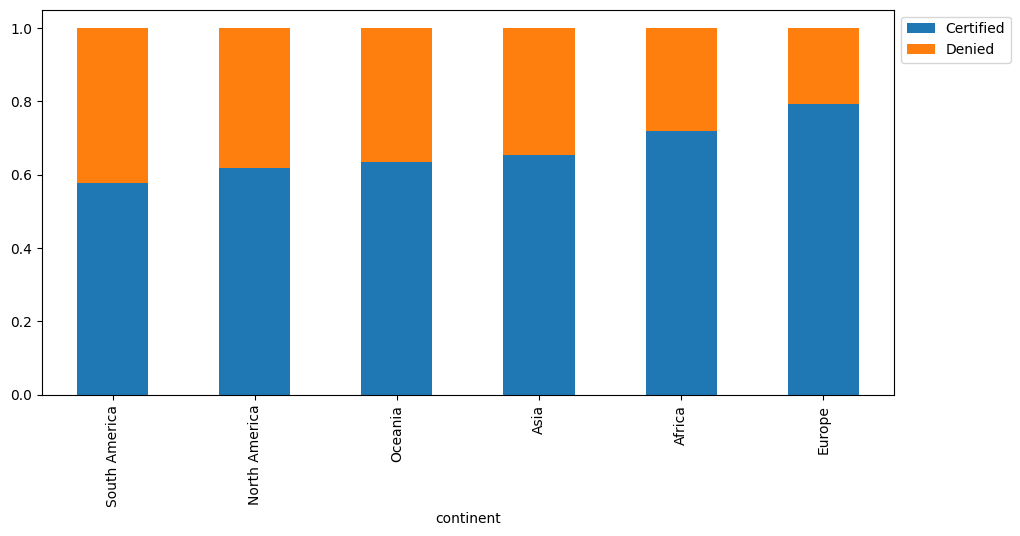

In [ ]:
stacked_barplot(data,'continent','case_status')

* Employees from Europe are Certified visa more.
* And the employees from South America are Certified less.

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


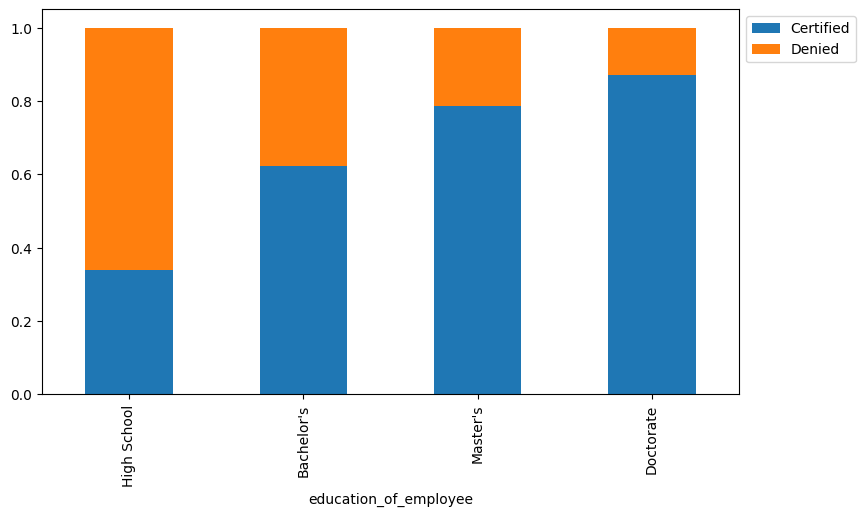

In [ ]:
stacked_barplot(data,'education_of_employee','case_status')

* Employees with doctorate are more Certified than the others.
* Employees with High school education are more denied.




case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


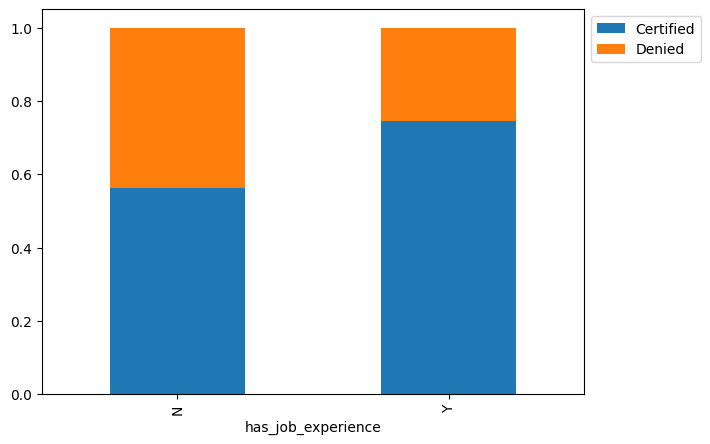

In [ ]:
stacked_barplot(data,'has_job_experience','case_status')

* Employees with job experience are more Certified than the others.
* Employees with less job experience are more denied.

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


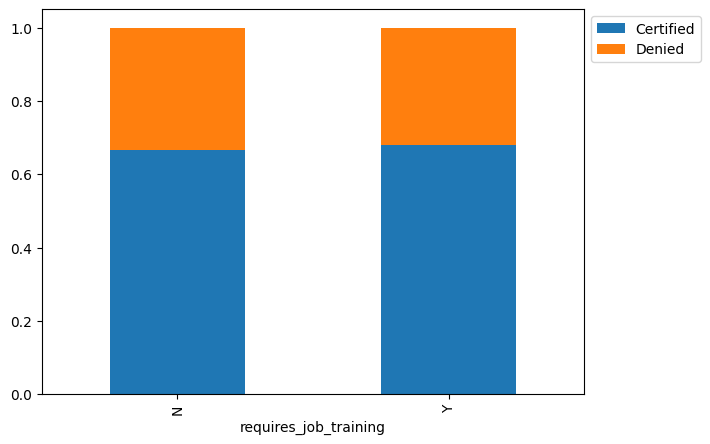

In [ ]:
stacked_barplot(data,'requires_job_training','case_status')

* Requires job training and not requires job training are not much impacting to the certifiying or deniying visa.

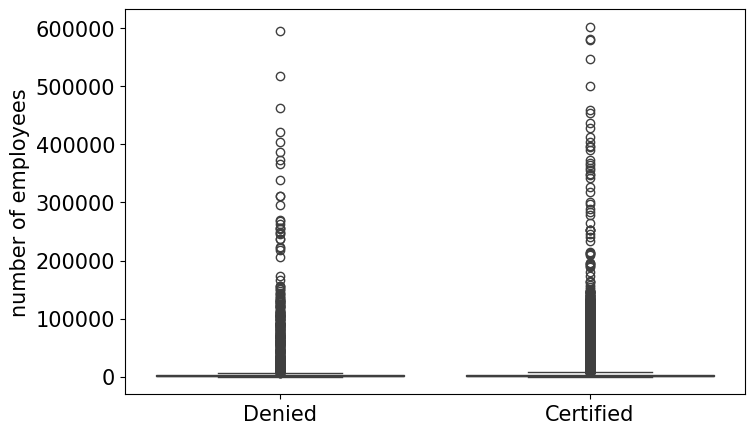

In [ ]:
# visualizing the relationship between avg room price and booking cancellation
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="case_status", y="no_of_employees")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('')
plt.ylabel('number of employees', fontsize=15);
plt.show()

* Number of employees has outliers in both denied and certified.
* As number of employees is not affecting much to certication of visa.

case_status  Certified  Denied    All
yr_of_estab                          
All              17018    8462  25480
1998               736     398   1134
2001               656     361   1017
2005               719     332   1051
2007               682     312    994
...                ...     ...    ...
1822                 3       1      4
1820                 5       1      6
1842                 5       1      6
1810                 3       0      3
1846                 4       0      4

[200 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


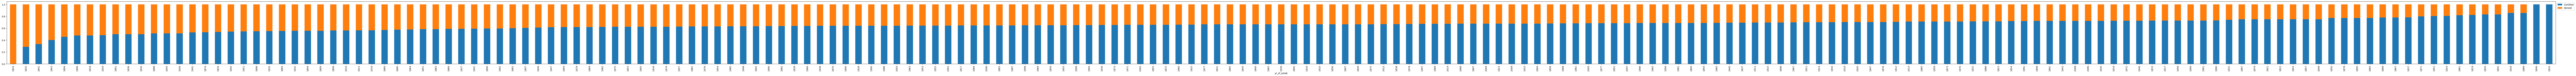

In [ ]:
stacked_barplot(data,'yr_of_estab','case_status')

* Certifiying Visa is improving year by year.
* In 1824 ,not certified a single visa.

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


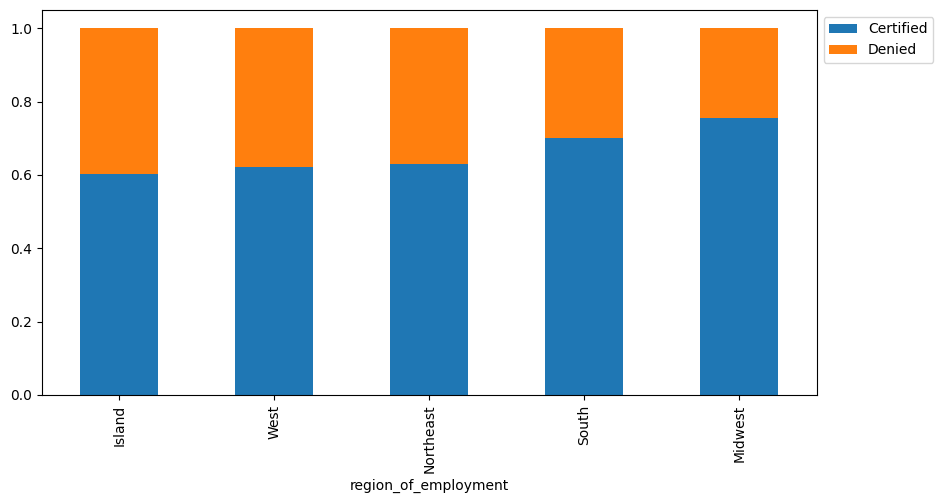

In [ ]:
stacked_barplot(data,'region_of_employment','case_status')

* Mildwest region of employment are more certification than other region.
* Island region has less certification.

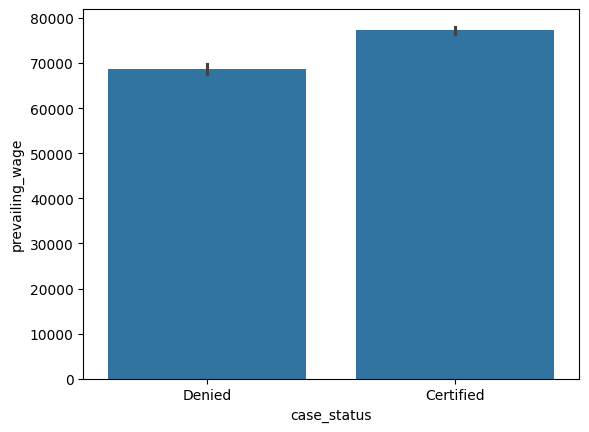

In [ ]:
sns.barplot(data=data,x='case_status',y='prevailing_wage')
plt.show()

* With highest wages has certified more.

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


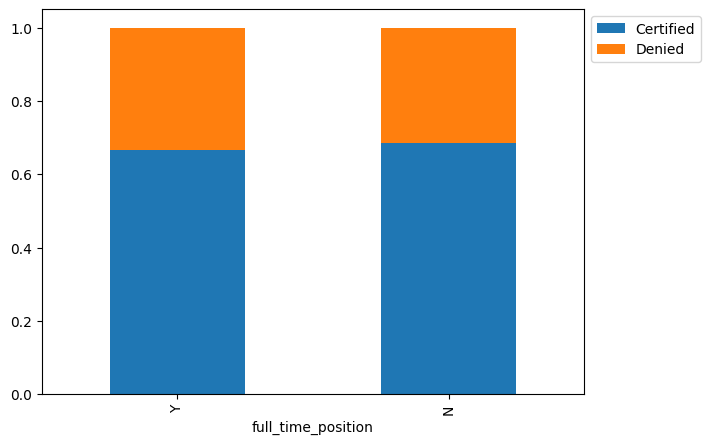

In [ ]:
stacked_barplot(data,'full_time_position','case_status')

* Full time position or not is not effecting that much to visa certification.

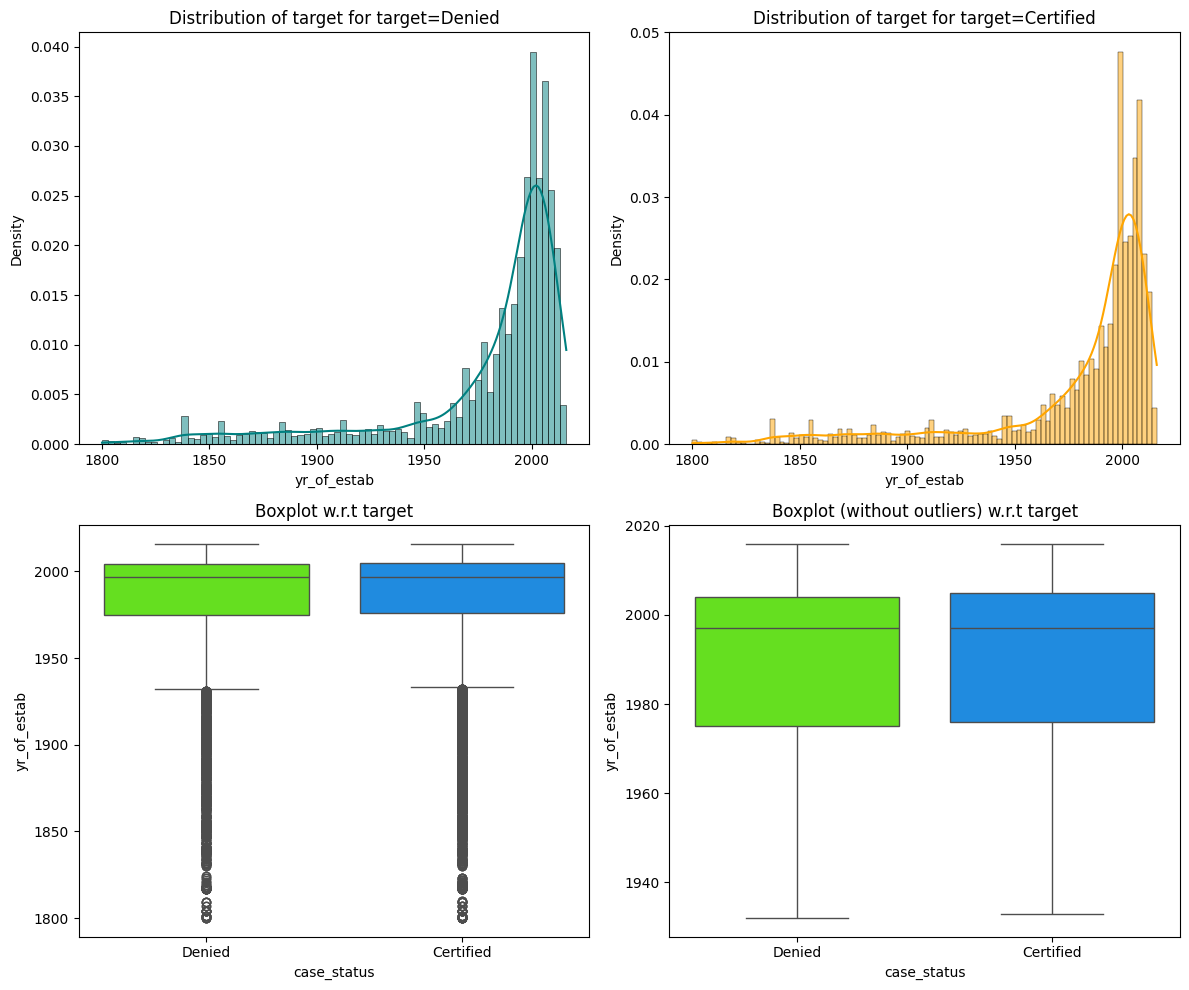

In [ ]:
distribution_plot_wrt_target(data, "yr_of_estab", "case_status")

* percentage of certified and denied are not getting affected by the year of establishment.

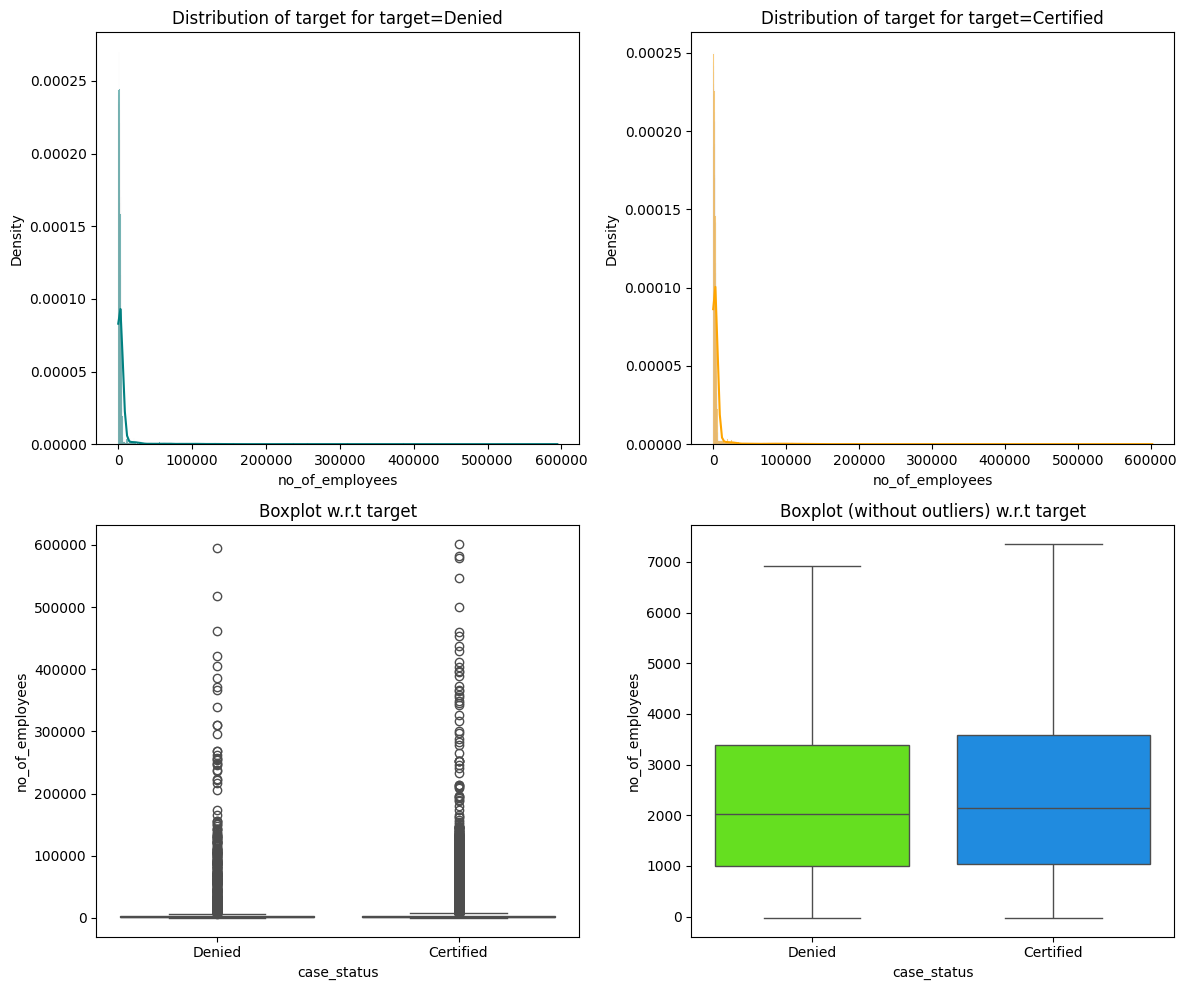

In [ ]:
distribution_plot_wrt_target(data, "no_of_employees", "case_status")

* No of employees also has no effect on deny or certify.

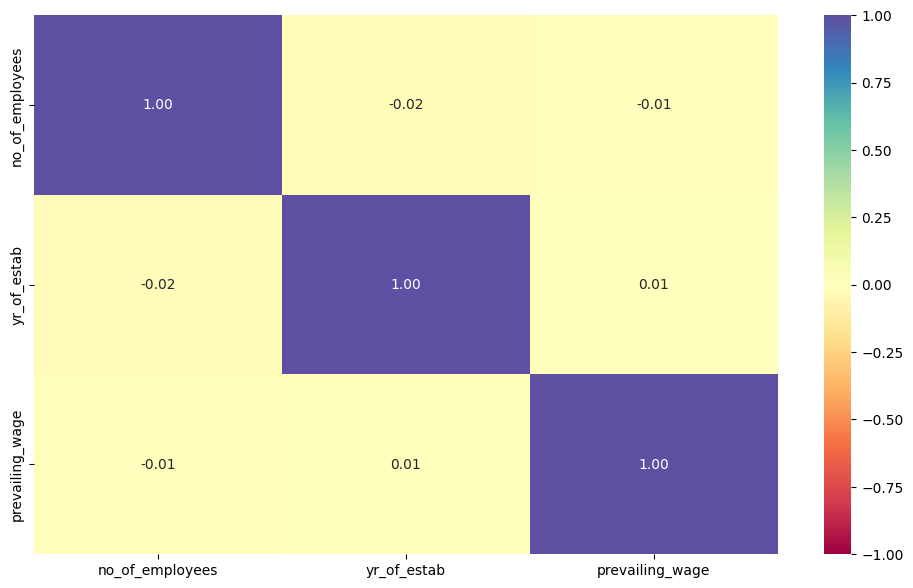

In [ ]:
# checking the correlation between the features using heatmap
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* Number of employees has negative correlation with year of establishment and previaling wages.
* year of establishment has postive correlation with prevailing wages.


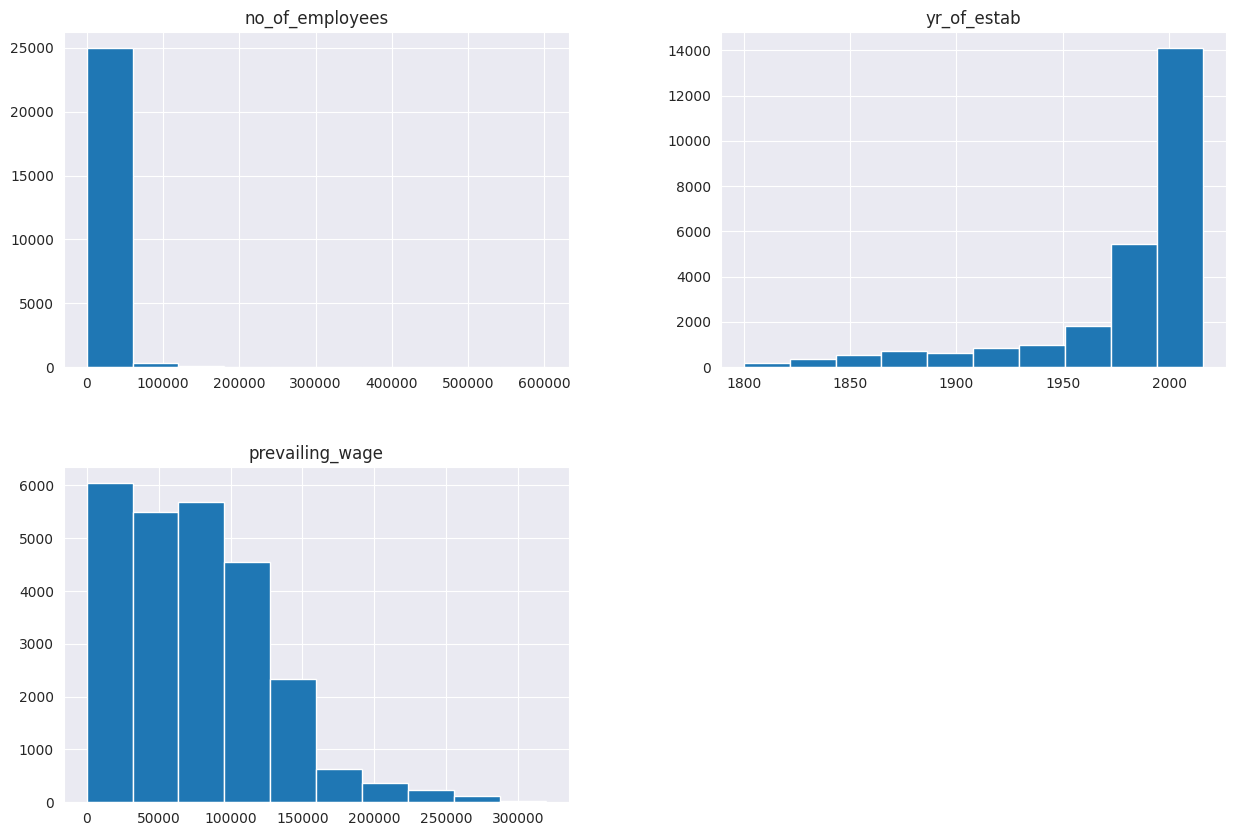

In [ ]:
# checking the data
sns.set_style("darkgrid")
data.hist(figsize=(15,10))
plt.show()

###Outliers Check

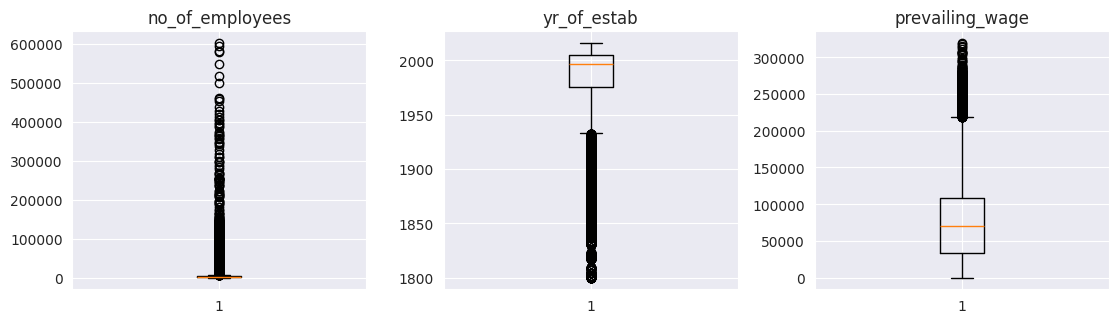

In [ ]:
# checking the outliers in the dataset
plt.figure(figsize=(15,12))
for i, variable in enumerate (cols_list):
  plt.subplot(4,4,i+1)
  plt.boxplot(data[variable],whis=1.5)
  plt.tight_layout()
  plt.title(variable)
plt.show()

**Observations**

* There are quite a few outliers in the data.
* However, we will not treat them.
* And Here is a year of establishment, no of employees, prevailing wages column which looks genuine..
* Treating outliers which looks genuine will lead to loss in data.

In [ ]:
min=data['yr_of_estab'].min()
max=data['yr_of_estab'].max()
print(max-min)
max,min

216


(2016, 1800)

###Summary of EDA

* The dataset has 25480 rows and 12 columns
* Only 3 variables are numerical rest all are object types.
* Should work on no of employees column.

**Data cleaning**

* Drop "case_id" as "case_id" is unique for each candidate and might not add value to modeling.

**Observations from EDA**

*Univariate Analysis*

**-Continent:** Most of the employees are from Asia continent.Less number of employees are from oceania.

**-Education of employees:**Number of Bachelor's are more than others.Number of Master's are lil less than bachelor's.Employees who has doctorate are very less even compared to high school.

**-Has job experience:**Employees with experience are more than the employees without experience.Employess with experience has 58%.Whereas employees without experience has 41.9%.

**-Requires job training:**Employees who doesn't requires job training are more than the employees who requires job training.Those who dont need job training are 88.4%.Whereas who need job training are 11.6%.

**-Region of employement:**Employees who are from Northeast are more than other regions.Employees from Island are very less compared to others.

**-Unit of wages:**Wages paid based on year is much more than others.Wages paid based on month is much lesser than others.

**-Full time position:**Employees with full time are much more than employees with part time.Employees with full time have 89.4%.Employees with part time have 10.64%.

**Case study:**Employees with certified visa are much more than denied.Employees with certified visa are 66.8%.Employees with denied visa are 33.2%.


-------------------------------------------------------------------------------



*Bivariate Analysis*

**Continent:**Employees from Europe are Certified visa more.And the employees from South America are Certified less.

**-Education of employees:**Employees with doctorate are more Certified than the others.Employees with High school education are more denied.

**-Has job experience:**Employees with job experience are more Certified than the others.Employees with less job experience are more denied.

**-Requires job training:**Requires job training and not requires job training are not much impacting to the certifiying or deniying visa.

**-Year of establishment:**Certifiying Visa is improving year by year.In 1824 ,not certified a single visa.

**-Region of employement:**Mildwest region of employment are more certification than other region.Island region has less certification.

**-full time position:**Full time position or not is not effecting that much to visa certification.

##Feature engineering

Checking out no of employees columns because it has negative values in it.

In [ ]:
min=data['no_of_employees'].min()
max=data['no_of_employees'].max()
print(max-min)
max,min

602095


(602069, -26)

Multiplying negative values with -1 to convert them to positive numbers.

In [ ]:
data.loc[data['no_of_employees']<0,'no_of_employees']*=-1

In [ ]:
# checking whether the no of employees column has any negative values even after treating them
data[data['no_of_employees']<0].sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0.000
unit_of_wage,0


In [ ]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


**Lets check the count of each unique category in each of the categorical variables.**

In [ ]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

case_id
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: count, Length: 25480, dtype: int64
--------------------------------------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      

**The case id column will not add any value to our analysis so lets drop it before we move forward.**

In [ ]:
## dropping the case id column
data = data.drop(["case_id"], axis=1)

In [ ]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


#Data preparation for modeling

In [ ]:
data = data.drop(["requires_job_training","no_of_employees", "full_time_position"], axis=1)

In [ ]:
x = data.drop(["case_status"], axis=1)
y = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

x_temp, x_test, y_temp, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

x_train, x_val, y_train, y_val = train_test_split(
    x_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(x_train.shape, x_val.shape, x_test.shape)

(15288, 7) (5096, 7) (5096, 7)


In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in validation data =", x_val.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 15288
Number of rows in validation data = 5096
Number of rows in test data = 5096




```
Training dataset
```



In [ ]:
cols = x_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(x_train[i].value_counts())
    print("*" * 30)

continent
Asia             10085
Europe            2285
North America     1944
South America      528
Africa             333
Oceania            113
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     6141
Master's       5792
High School    2045
Doctorate      1310
Name: count, dtype: int64
******************************
has_job_experience
Y    8845
N    6443
Name: count, dtype: int64
******************************
region_of_employment
Northeast    4312
South        4248
West         3920
Midwest      2576
Island        232
Name: count, dtype: int64
******************************
unit_of_wage
Year     13786
Hour      1286
Week       156
Month       60
Name: count, dtype: int64
******************************




```
Validation dataset
```



In [ ]:
cols = x_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(x_val[i].value_counts())
    print("*" * 30)

continent
Asia             3395
Europe            713
North America     655
South America     173
Africa            121
Oceania            39
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     2033
Master's       1886
High School     694
Doctorate       483
Name: count, dtype: int64
******************************
has_job_experience
Y    2963
N    2133
Name: count, dtype: int64
******************************
region_of_employment
Northeast    1430
South        1389
West         1352
Midwest       855
Island         70
Name: count, dtype: int64
******************************
unit_of_wage
Year     4576
Hour      452
Week       57
Month      11
Name: count, dtype: int64
******************************




```
Test Dataset
```


In [ ]:
cols = x_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(x_test[i].value_counts())
    print("*" * 30)


continent
Asia             3381
Europe            734
North America     693
South America     151
Africa             97
Oceania            40
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     2060
Master's       1956
High School     681
Doctorate       399
Name: count, dtype: int64
******************************
has_job_experience
Y    2994
N    2102
Name: count, dtype: int64
******************************
region_of_employment
Northeast    1453
South        1380
West         1314
Midwest       876
Island         73
Name: count, dtype: int64
******************************
unit_of_wage
Year     4600
Hour      419
Week       59
Month      18
Name: count, dtype: int64
******************************


###Creating dummy variables

In [ ]:
x_train = pd.get_dummies(x_train, drop_first=True)
x_val = pd.get_dummies(x_val, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)
print(x_train.shape, x_val.shape, x_test.shape)

(15288, 18) (5096, 18) (5096, 18)


* After encoding there are 18 columns

#Model building

###Model evaluation criterion
**Model can make wrong predictions as:**

* Predicting as visa denied but in real visa is approved - Loss of resources.
* Predicting as visa approved but in reality visa denied - Loss of opportunity.

**Which case is more important?**

Both the cases are important as:

If we predicting as visa denied but in real visa is approved - Loss of resources.

If we predicting as visa approved but in reality visa denied - Loss of opportunity.
**How to reduce this loss?**

We need to reduce both False Negatives and False Positives

f1_score should be maximized as the greater the f1_score, the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly

fi_score is computed as
$$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
##Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1,0]):
  '''model:Classifier to predict values of x
  y_actual: ground truth
  '''
  y_predict=model.predict(x_test)
  cm=metrics.confusion_matrix(y_actual,y_predict,labels=[0,1])
  df_cm=pd.DataFrame(cm,index=[i for i in ['Actual -No','Actual-Yes']],
                     columns=[i for i in ['predicted-No','predicted-Yes']])
  group_counts=['{0:0.f}'.format(value)for value in cm.flatten()]
  group_percentages=['{0.2%}'.format(value)for value in cm.flatten()/np.sum(cm)]
  labels=[f'{v1}/n{v2}' for v1, v2 in
          zip(group_counts,group_percentages)]
  labels=np.asarray(labels).reshape(2,2)
  plt.figure(figsize=(10,7))
  sns.heatmap(df_cm,annot=labels,fmt='')
  plt.ylabel('True label')
  plt.xlabel('predicted label')

##Initial Model Building

###Model building - Original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(x_train, y_train)
    scores = recall_score(y_train, model.predict(x_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(x_train, y_train)
    scores_val = recall_score(y_val, model.predict(x_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9845249755142018
Random forest: 1.0
GBM: 0.8768854064642507
Adaboost: 0.886973555337904
dtree: 1.0

Validation Performance:

Bagging: 0.7746768507638073
Random forest: 0.7955346650998825
GBM: 0.8707403055229143
Adaboost: 0.8786721504112809
dtree: 0.7397179788484136


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(x_train, y_train)
    scores_train = recall_score(y_train, model.predict(x_train))
    scores_val = recall_score(y_val, model.predict(x_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9845, Validation Score: 0.7747, Difference: 0.2098
Random forest: Training Score: 1.0000, Validation Score: 0.7955, Difference: 0.2045
GBM: Training Score: 0.8769, Validation Score: 0.8707, Difference: 0.0061
Adaboost: Training Score: 0.8870, Validation Score: 0.8787, Difference: 0.0083
dtree: Training Score: 1.0000, Validation Score: 0.7397, Difference: 0.2603


* GBM has the best performance followed by AdaBoost model as per the validation performance

###Model Building - Oversampled Data

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
x_train_over, y_train_over = sm.fit_resample(x_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(x_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 10210
Before Oversampling, counts of label 'No': 5078 

After Oversampling, counts of label 'Yes': 10210
After Oversampling, counts of label 'No': 10210 

After Oversampling, the shape of train_X: (20420, 18)
After Oversampling, the shape of train_y: (20420,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(x_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(x_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(x_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(x_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9794319294809011
Random forest: 0.9999020568070519
GBM: 0.8442703232125367
Adaboost: 0.8590597453476984
dtree: 1.0

Validation Performance:

Bagging: 0.7403055229142186
Random forest: 0.7790834312573442
GBM: 0.836662749706228
Adaboost: 0.8569330199764983
dtree: 0.7162162162162162


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(x_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(x_train_over))
    scores_val = recall_score(y_val, model.predict(x_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9794, Validation Score: 0.7403, Difference: 0.2391
Random forest: Training Score: 0.9999, Validation Score: 0.7791, Difference: 0.2208
GBM: Training Score: 0.8443, Validation Score: 0.8367, Difference: 0.0076
Adaboost: Training Score: 0.8591, Validation Score: 0.8569, Difference: 0.0021
dtree: Training Score: 1.0000, Validation Score: 0.7162, Difference: 0.2838


* Adaboost has the best performance on oversampled data followed by GBM

###Model Building - Undersampled Data

In [ ]:
rus = RandomUnderSampler(random_state=1)
x_train_un, y_train_un = rus.fit_resample(x_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(x_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 10210
Before Under Sampling, counts of label 'No': 5078 

After Under Sampling, counts of label 'Yes': 5078
After Under Sampling, counts of label 'No': 5078 

After Under Sampling, the shape of train_X: (10156, 18)
After Under Sampling, the shape of train_y: (10156,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(x_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(x_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(x_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(x_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9629775502166207
Random forest: 0.9998030720756204
GBM: 0.7512800315084679
Adaboost: 0.7026388341866877
dtree: 1.0

Validation Performance:

Bagging: 0.61427732079906
Random forest: 0.6551116333725029
GBM: 0.736192714453584
Adaboost: 0.7029964747356052
dtree: 0.6239717978848414


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(x_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(x_train_un))
    scores_val = recall_score(y_val, model.predict(x_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9630, Validation Score: 0.6143, Difference: 0.3487
Random forest: Training Score: 0.9998, Validation Score: 0.6551, Difference: 0.3447
GBM: Training Score: 0.7513, Validation Score: 0.7362, Difference: 0.0151
Adaboost: Training Score: 0.7026, Validation Score: 0.7030, Difference: -0.0004
dtree: Training Score: 1.0000, Validation Score: 0.6240, Difference: 0.3760


* GBM has the best performance followed by AdaBoost model as per the validation performance
* After building models, it was observed that both the GBM and Adaboost models, trained on an undersampled dataset, as well as the Adaboost and GBM model trained on an oversampled dataset, exhibited strong performance on both the training and validation datasets.
* Sometimes models might overfit after undersampling and oversampling, so it's better to tune the models to get a generalized performance
* We will tune these 3 models using the same data (undersampled or oversampled) as we trained them on before

#Hyperparameter tuning

###Tuning AdaBoostClassifier model with undersampled data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 10, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.9312726426438074:
CPU times: user 1.51 s, sys: 250 ms, total: 1.76 s
Wall time: 50.4 s


In [ ]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=20,
    learning_rate=0.1,
    estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adb.fit(x_train_un, y_train_un)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=20, random_state=1)

In [ ]:
# Checking model's performance on training set
adb_train= model_performance_classification_sklearn(tuned_adb, x_train_un, y_train_un)
adb_train

,Accuracy,Recall,Precision,F1
0,0.687,0.654,0.700,0.676


In [ ]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, x_val, y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.684,0.659,0.833,0.736


###Tuning Gradient Boosting model with Undersampled Data

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(125,175,25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 150, 'max_features': 0.5, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.7439969357278616:
CPU times: user 5.33 s, sys: 634 ms, total: 5.96 s
Wall time: 4min 12s


In [ ]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=150,
    max_features=0.5,
    learning_rate=0.01,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(x_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=0.5,
                           n_estimators=150, random_state=1, subsample=0.9)

In [ ]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, x_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.705,0.745,0.689,0.716


In [ ]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, x_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.720,0.741,0.823,0.780


###Tuning Gradient Boosting model with Oversampled data

In [ ]:
#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'n_estimators': 75, 'max_features': 0.7, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8808031341821744:


In [ ]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=1,
    learning_rate=1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(x_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=1, max_features=1, n_estimators=125,
                           random_state=1, subsample=0.7)

In [ ]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm1, x_train_over, y_train_over)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.690,0.748,0.671,0.707


### Gradient boost model for undersampled data on validation dataset

In [ ]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm1, x_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.720,0.741,0.823,0.780


#Model Comparison and Final model selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb_train.T,

    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.705,0.690,0.687
Recall,0.745,0.748,0.654
Precision,0.689,0.671,0.700
F1,0.716,0.707,0.676


In [ ]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [ gbm1_val.T, gbm2_val.T, adb_val.T], axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.720,0.720,0.684
Recall,0.741,0.741,0.659
Precision,0.823,0.823,0.833
F1,0.780,0.780,0.736


* AdaBoost model trained with undersampled data has generalised performance , so let's consider it as the best model.

### Let's check the performance on test set

In [ ]:
ada_test = model_performance_classification_sklearn(tuned_adb, x_test, y_test)
ada_test

,Accuracy,Recall,Precision,F1
0,0.720,0.887,0.743,0.809


* The Gradient boosting model trained on undersampled data has given ~65% recall on the test set
* This performance is in line with what we achieved with this model on the train and validation sets
* So, this is a generalized model

##Feature importance

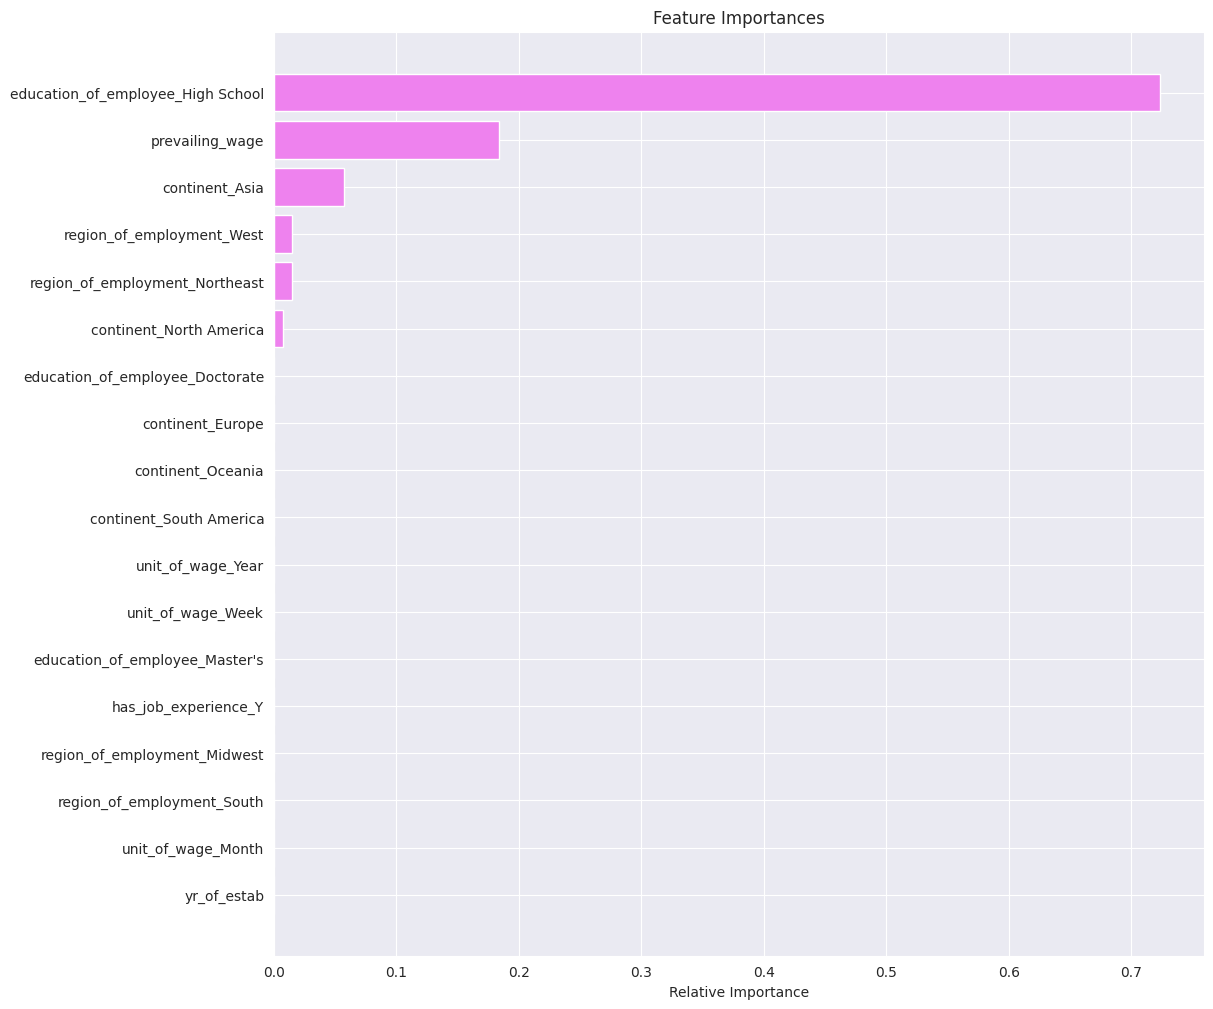

In [ ]:
feature_names = x_train.columns
importances = tuned_adb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* We can see that education of employee-high school is effecting the most.
* Has job experience yes, prevailing wages is influencing the visa certification.

#Business insights and recommendations

##Business insights

* Employees from Europe are Certified visa more.And the employees from South America are Certified less.
* Employees with doctorate are more Certified than the others.Employees with High school education are more denied.
* Employees with job experience are more Certified than the others.Employees with less job experience are more denied.
* Mildwest region of employment are more certification than other region.Island region has less certification.
* Those employees who has high school education level is effecting a lot.Later on Those employees who have job experience might have higher chances to get certified but high school education level have higher chances to get denied

##Recommendations

**Feature Engineering:** Explore creating new features based on existing ones.

**Focus on the employees who have more education:** Those who have high school education are effected.

**Focus on the employees who has job experience - yes:** Those who has job experience are certified more.
